In [ ]:
!pip install opencv-python
!pip install tensorflow==2.6.0
!pip install tensorflow --upgrade --user
!pip install pip --upgrade --user


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.4/458.4 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 73.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 82.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30692 sha256=80cbe5ff6a84cae44183bd67ffc37fc1ee60f42b0553f1899e53c43a57ced045
  Stored in directory: /root/.cache/pip/wheels/3a/ce/7a/27094f689461801c934296d07078773603663dfcaca63bb064
  Created wheel for term

**Importing required libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import numpy as np
import pathlib
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#assigning directory
directory=pathlib.Path("/content/drive/MyDrive/CT_KIDNEY")

In [ ]:
# Just needed in case you'd like to append it to an array
data = []

for filename in os.listdir("."):
    if filename.endswith("jpeg"):
        # Your code comes here such as
        print(filename)
        data.append(filename)

In [ ]:
#count of images in the directory given
image_count=len(list(directory.glob('*/*.jpg')))
#print(list(directory.glob('/*.jpg')))
image_count

1600

In [ ]:
#creating dictionary of flower species
flower_images_dict={
    "Cyst":list(directory.glob('Cyst/*.jpg')),
    "Normal":list(directory.glob('Normal/*.jpg')),
    "Stone":list(directory.glob('Stone/*.jpg')),
    "Tumor":list(directory.glob('Tumor/*.jpg'))
}

In [ ]:
flower_images_dict

In [ ]:
#Different species list
keys=["Cyst","Normal","Stone","Tumor"]

In [ ]:
#resizing and creating labels using computer vision
count = 0
resized,labels=[],[]
for flower_name,images in flower_images_dict.items():
    for image in images:
        print("completed")
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(224,224))
        count=count+1
        print(count)
        resized.append(resized_image)
        labels.append(keys.index(flower_name))
flower_images_dict

completed
1
completed
2
completed
3
completed
4
completed
5
completed
6
completed
7
completed
8
completed
9
completed
10
completed
11
completed
12
completed
13
completed
14
completed
15
completed
16
completed
17
completed
18
completed
19
completed
20
completed
21
completed
22
completed
23
completed
24
completed
25
completed
26
completed
27
completed
28
completed
29
completed
30
completed
31
completed
32
completed
33
completed
34
completed
35
completed
36
completed
37
completed
38
completed
39
completed
40
completed
41
completed
42
completed
43
completed
44
completed
45
completed
46
completed
47
completed
48
completed
49
completed
50
completed
51
completed
52
completed
53
completed
54
completed
55
completed
56
completed
57
completed
58
completed
59
completed
60
completed
61
completed
62
completed
63
completed
64
completed
65
completed
66
completed
67
completed
68
completed
69
completed
70
completed
71
completed
72
completed
73
completed
74
completed
75
completed
76
completed
77
complete

{'Cyst': [PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (10).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (100).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (103).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (102).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (101).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (1).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (108).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (106).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (107).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (105).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (104).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (112).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (111).jpg'),
  PosixPath('/content/drive/MyDrive/CT_KIDNEY/Cyst/Cyst- (11).jpg'),
  PosixPath('/co

In [ ]:
#function to print images
def print_image(i,j):
    plt.imshow(i)
    plt.title(keys[j])

In [ ]:
#splitting data into train and test
#if any integer is given to random_state it will generate and give same set of data each time we run the code and if we give
#None different sequences will be generated
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resized,labels,test_size=0.25,random_state=0)

In [ ]:
#normalizing data
x_train_scaled=np.array(x_train)/255
x_test_scaled=np.array(x_test)/255

In [ ]:
x_train_scaled.shape

(1200, 224, 224, 3)

In [ ]:
y_train=np.array(y_train)
y_train.shape

(1200,)

In [ ]:
x_test_scaled.shape

(400, 224, 224, 3)

In [ ]:
y_test=np.array(y_test)
y_test.shape

(400,)

**Callbacks for stopping when the required accuracy is achieved**

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("call")
        if(logs.get('accuracy') > .99):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))
            self.model.stop_training = True
callbacks = myCallback()

# **4. CNN Model only with Augumentation layers**

# **4.5 Activation function = "Relu" ,Optimizer = "AdaDelta"**

In [ ]:
model4_5=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model4_5.compile(optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare4_5 = model4_5.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 74s 2s/step - loss: 1.3738 - accuracy: 0.2867
Epoch 2/10
38/38 [==============================] - 68s 2s/step - loss: 1.3122 - accuracy: 0.4175
Epoch 3/10
38/38 [==============================] - 67s 2s/step - loss: 1.2630 - accuracy: 0.4425
Epoch 4/10
38/38 [==============================] - 67s 2s/step - loss: 1.2195 - accuracy: 0.4650
Epoch 5/10
38/38 [==============================] - 70s 2s/step - loss: 1.1791 - accuracy: 0.4750
Epoch 6/10
38/38 [==============================] - 69s 2s/step - loss: 1.1529 - accuracy: 0.4975
Epoch 7/10
38/38 [==============================] - 67s 2s/step - loss: 1.1040 - accuracy: 0.5408
Epoch 8/10
38/38 [==============================] - 67s 2s/step - loss: 1.0674 - accuracy: 0.5792
Epoch 9/10
38/38 [==============================] - 74s 2s/step - loss: 1.0366 - accuracy: 0.6058
Epoch 10/10
38/38 [==============================] - 68s 2s/step - loss: 1.0282 - accuracy: 0.6058


In [ ]:
model4_5.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 6s 438ms/step - loss: 0.9143 - accuracy: 0.7125


[0.9143052697181702, 0.7124999761581421]

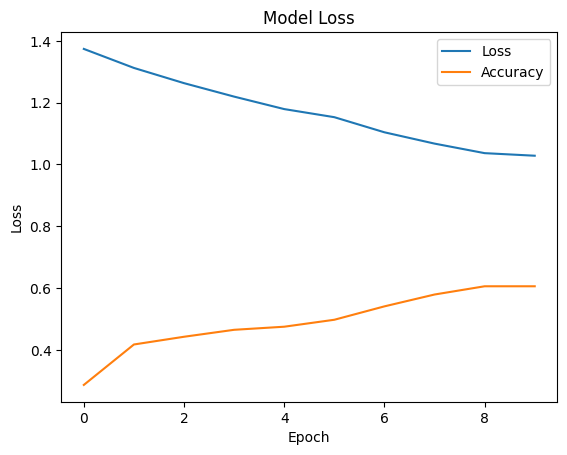

In [ ]:
# Plot training & validation loss values
plt.plot(compare4_5.history['loss'])
plt.plot(compare4_5.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **5. CNN Model with two different augumentation layers**

# **5.1 Activation function = "Relu" ,Optimizer = "Adam"**

In [ ]:
model5_1=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model5_1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare5_1 = model5_1.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 65s 2s/step - loss: 4.0008 - accuracy: 0.4517
Epoch 2/10
38/38 [==============================] - 59s 2s/step - loss: 0.6678 - accuracy: 0.7667
Epoch 3/10
38/38 [==============================] - 64s 2s/step - loss: 0.4675 - accuracy: 0.8392
Epoch 4/10
38/38 [==============================] - 59s 2s/step - loss: 0.3455 - accuracy: 0.8908
Epoch 5/10
38/38 [==============================] - 59s 2s/step - loss: 0.2618 - accuracy: 0.9142
Epoch 6/10
38/38 [==============================] - 59s 2s/step - loss: 0.2118 - accuracy: 0.9333
Epoch 7/10
38/38 [==============================] - 58s 2s/step - loss: 0.2108 - accuracy: 0.9225
Epoch 8/10
38/38 [==============================] - 58s 2s/step - loss: 0.1784 - accuracy: 0.9408
Epoch 9/10
38/38 [==============================] - 58s 2s/step - loss: 0.1171 - accuracy: 0.9658
Epoch 10/10
38/38 [==============================] - 59s 2s/step - loss: 0.1299 - accuracy: 0.9542


In [ ]:
model5_1.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 6s 450ms/step - loss: 0.0743 - accuracy: 0.9825


[0.07433391362428665, 0.9825000166893005]

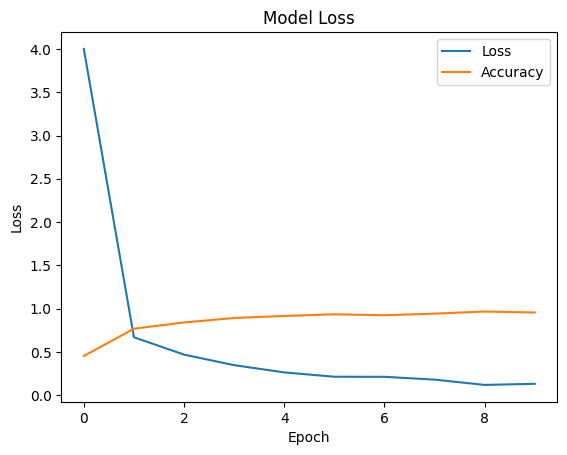

In [ ]:
# Plot training & validation loss values
plt.plot(compare5_1.history['loss'])
plt.plot(compare5_1.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **5.2 Activation function = "Relu" ,Optimizer = "Adamax"**

In [ ]:
model5_2=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model5_2.compile(optimizer="adamax",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare5_2 = model5_2.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 61s 2s/step - loss: 3.0900 - accuracy: 0.4967
Epoch 2/10
38/38 [==============================] - 63s 2s/step - loss: 0.6603 - accuracy: 0.7475
Epoch 3/10
38/38 [==============================] - 59s 2s/step - loss: 0.4396 - accuracy: 0.8400
Epoch 4/10
38/38 [==============================] - 58s 2s/step - loss: 0.3885 - accuracy: 0.8550
Epoch 5/10
38/38 [==============================] - 57s 1s/step - loss: 0.3136 - accuracy: 0.8858
Epoch 6/10
38/38 [==============================] - 58s 1s/step - loss: 0.2584 - accuracy: 0.9225
Epoch 7/10
38/38 [==============================] - 59s 2s/step - loss: 0.2095 - accuracy: 0.9383
Epoch 8/10
38/38 [==============================] - 60s 2s/step - loss: 0.2116 - accuracy: 0.9392
Epoch 9/10
38/38 [==============================] - 59s 2s/step - loss: 0.2085 - accuracy: 0.9358
Epoch 10/10
38/38 [==============================] - 60s 2s/step - loss: 0.1645 - accuracy: 0.9558


In [ ]:
model5_2.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 4s 302ms/step - loss: 0.1342 - accuracy: 0.9675


[0.1342371255159378, 0.9674999713897705]

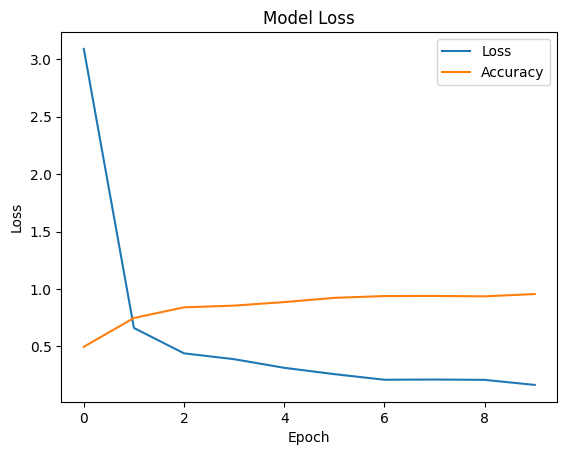

In [ ]:
# Plot training & validation loss values
plt.plot(compare5_2.history['loss'])
plt.plot(compare5_2.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **5.3 Activation function = "Relu" ,Optimizer = "RMSprop"**

In [ ]:
model5_3=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model5_3.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare5_3 = model5_3.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 63s 2s/step - loss: 3.1701 - accuracy: 0.4767
Epoch 2/10
38/38 [==============================] - 56s 1s/step - loss: 0.7082 - accuracy: 0.7283
Epoch 3/10
38/38 [==============================] - 55s 1s/step - loss: 0.5664 - accuracy: 0.7817
Epoch 4/10
38/38 [==============================] - 57s 1s/step - loss: 0.4291 - accuracy: 0.8367
Epoch 5/10
38/38 [==============================] - 58s 2s/step - loss: 0.3478 - accuracy: 0.8708
Epoch 6/10
38/38 [==============================] - 60s 2s/step - loss: 0.2815 - accuracy: 0.8933
Epoch 7/10
38/38 [==============================] - 61s 2s/step - loss: 0.2106 - accuracy: 0.9292
Epoch 8/10
38/38 [==============================] - 62s 2s/step - loss: 0.1871 - accuracy: 0.9358
Epoch 9/10
38/38 [==============================] - 61s 2s/step - loss: 0.1385 - accuracy: 0.9542
Epoch 10/10
38/38 [==============================] - 61s 2s/step - loss: 0.1347 - accuracy: 0.9633


In [ ]:
model5_3.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 4s 302ms/step - loss: 0.0622 - accuracy: 0.9825


[0.06221483647823334, 0.9825000166893005]

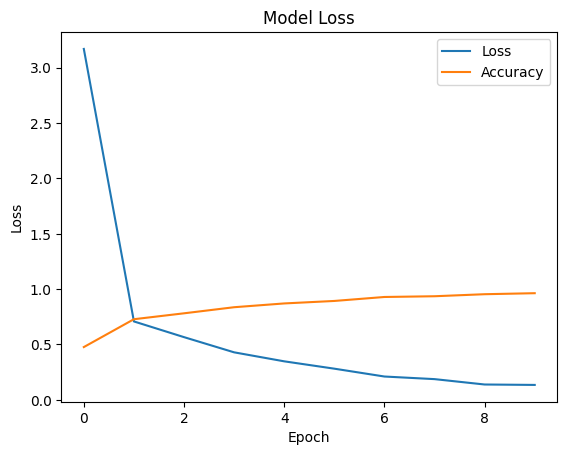

In [ ]:
# Plot training & validation loss values
plt.plot(compare5_3.history['loss'])
plt.plot(compare5_3.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **5.4 Activation function = "Relu" ,Optimizer = "SGD"**

In [ ]:
model5_4=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model5_4.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare5_4 = model5_4.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 62s 2s/step - loss: 1.2697 - accuracy: 0.3867
Epoch 2/10
38/38 [==============================] - 48s 1s/step - loss: 1.0006 - accuracy: 0.6000
Epoch 3/10
38/38 [==============================] - 54s 1s/step - loss: 0.8009 - accuracy: 0.6825
Epoch 4/10
38/38 [==============================] - 48s 1s/step - loss: 0.7261 - accuracy: 0.7025
Epoch 5/10
38/38 [==============================] - 51s 1s/step - loss: 0.6114 - accuracy: 0.7625
Epoch 6/10
38/38 [==============================] - 47s 1s/step - loss: 0.5175 - accuracy: 0.7975
Epoch 7/10
38/38 [==============================] - 52s 1s/step - loss: 0.4244 - accuracy: 0.8458
Epoch 8/10
38/38 [==============================] - 47s 1s/step - loss: 0.3781 - accuracy: 0.8533
Epoch 9/10
38/38 [==============================] - 51s 1s/step - loss: 0.3840 - accuracy: 0.8542
Epoch 10/10
38/38 [==============================] - 48s 1s/step - loss: 0.3802 - accuracy: 0.8717


In [ ]:
model5_4.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 7s 499ms/step - loss: 0.3230 - accuracy: 0.8500


[0.32301387190818787, 0.8500000238418579]

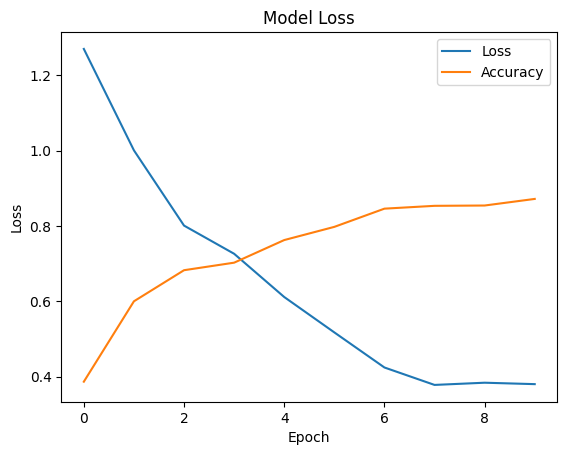

In [ ]:
# Plot training & validation loss values
plt.plot(compare5_4.history['loss'])
plt.plot(compare5_4.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **5.5 Activation function = "Relu" ,Optimizer = "AdaDelta"**

In [ ]:
model5_5=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model5_5.compile(optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
compare5_5 = model5_5.fit(x_train_scaled,np.array(y_train),epochs=10,callbacks=[callbacks])

Epoch 1/10
38/38 [==============================] - 72s 2s/step - loss: 1.3493 - accuracy: 0.3300
Epoch 2/10
38/38 [==============================] - 72s 2s/step - loss: 1.2762 - accuracy: 0.4117
Epoch 3/10
38/38 [==============================] - 71s 2s/step - loss: 1.2319 - accuracy: 0.4600
Epoch 4/10
38/38 [==============================] - 75s 2s/step - loss: 1.2026 - accuracy: 0.4783
Epoch 5/10
38/38 [==============================] - 71s 2s/step - loss: 1.1593 - accuracy: 0.5100
Epoch 6/10
38/38 [==============================] - 72s 2s/step - loss: 1.1353 - accuracy: 0.5358
Epoch 7/10
38/38 [==============================] - 71s 2s/step - loss: 1.0955 - accuracy: 0.5808
Epoch 8/10
38/38 [==============================] - 72s 2s/step - loss: 1.0651 - accuracy: 0.5908
Epoch 9/10
38/38 [==============================] - 67s 2s/step - loss: 1.0571 - accuracy: 0.6033
Epoch 10/10
38/38 [==============================] - 65s 2s/step - loss: 1.0205 - accuracy: 0.6175


In [ ]:
model5_5.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 6s 491ms/step - loss: 0.9745 - accuracy: 0.6700


[0.9745093584060669, 0.6700000166893005]

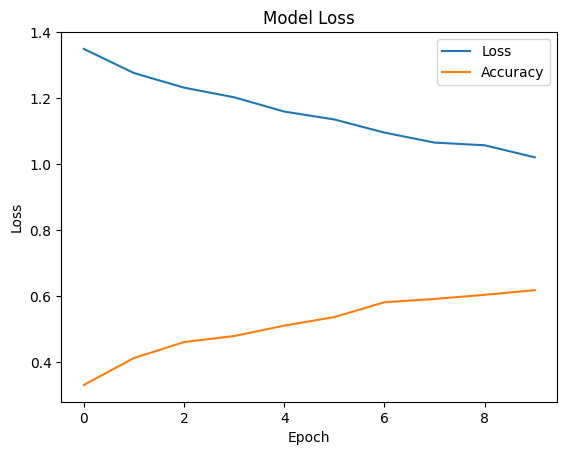

In [ ]:
# Plot training & validation loss values
plt.plot(compare5_5.history['loss'])
plt.plot(compare5_5.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **6. CNN Model with Data Augumentation layer and more dense layers**

In [ ]:
model5=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model5.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model5.fit(x_train_scaled,np.array(y_train),epochs=5)

Epoch 1/5
38/38 [==============================] - 60s 1s/step - loss: 1.1393 - accuracy: 0.6083
Epoch 2/5
38/38 [==============================] - 61s 2s/step - loss: 0.3729 - accuracy: 0.8742
Epoch 3/5
38/38 [==============================] - 60s 2s/step - loss: 0.1678 - accuracy: 0.9525
Epoch 4/5
38/38 [==============================] - 57s 2s/step - loss: 0.0767 - accuracy: 0.9733
Epoch 5/5
38/38 [==============================] - 56s 1s/step - loss: 0.0654 - accuracy: 0.9825


In [ ]:
model5.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 4s 297ms/step - loss: 0.0623 - accuracy: 0.9750


[0.062329936772584915, 0.9750000238418579]

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 24.6 MB/s eta 0:00:00


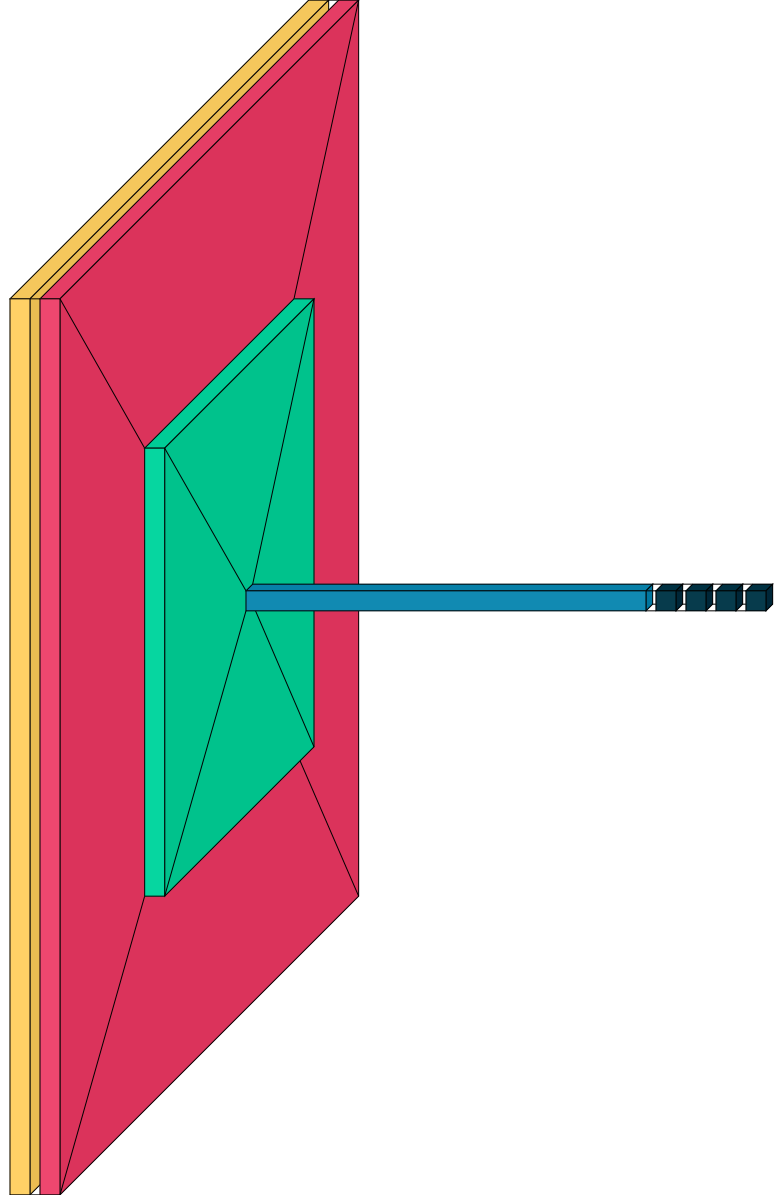

In [ ]:
import visualkeras
visualkeras.layered_view(model5)

# **7. CNN Model that uses Filters in all the Layers**

In [ ]:
myCNN=tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dense(4,activation="softmax")
])
myCNN.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
myCNN.fit(x_train_scaled,np.array(y_train),epochs=5)

Epoch 1/5
38/38 [==============================] - 192s 5s/step - loss: 1.0863 - accuracy: 0.8358
Epoch 2/5
38/38 [==============================] - 206s 5s/step - loss: 0.0073 - accuracy: 0.9992
Epoch 3/5
38/38 [==============================] - 180s 5s/step - loss: 2.8320e-04 - accuracy: 1.0000
Epoch 4/5
38/38 [==============================] - 170s 5s/step - loss: 8.6186e-05 - accuracy: 1.0000
Epoch 5/5
38/38 [==============================] - 175s 5s/step - loss: 6.0991e-05 - accuracy: 1.0000


In [ ]:
myCNN.evaluate(x_test_scaled,np.array(y_test))

13/13 [==============================] - 16s 1s/step - loss: 0.0040 - accuracy: 1.0000


[0.003964940086007118, 1.0]

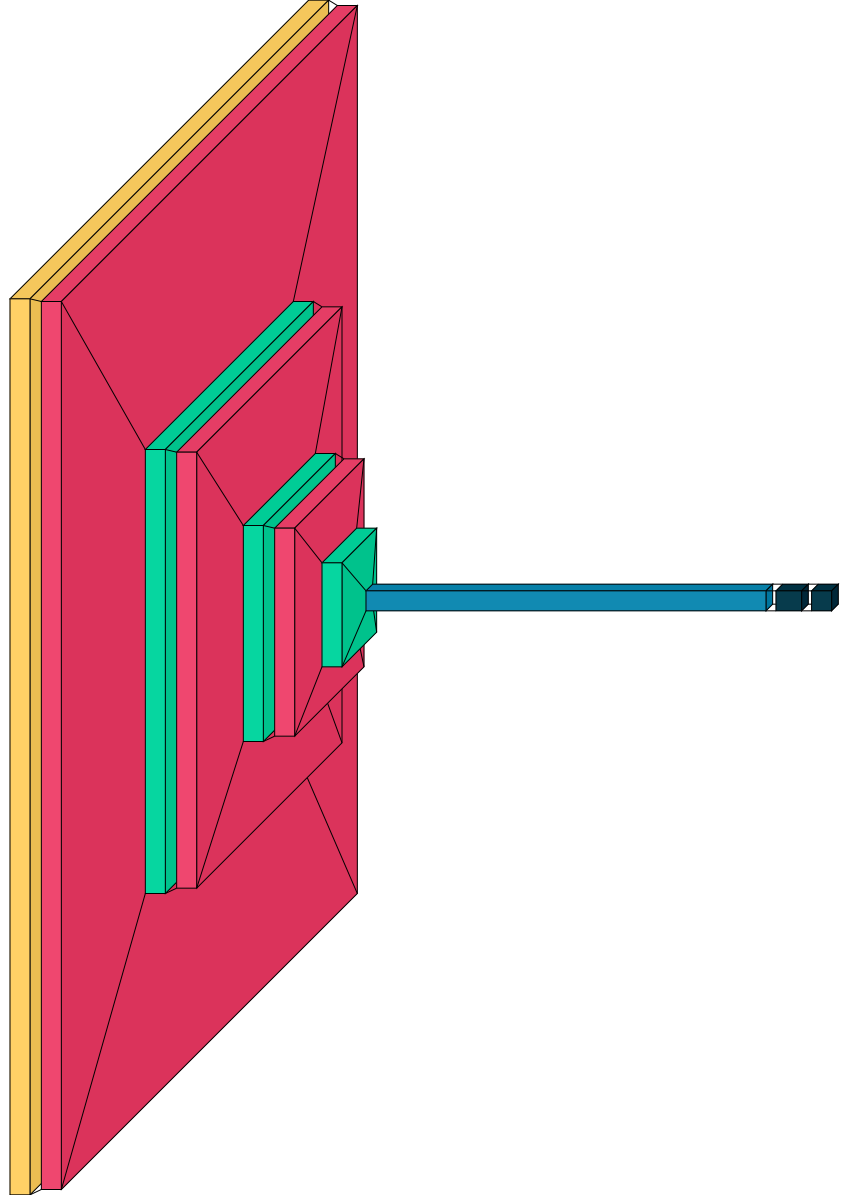

In [ ]:
visualkeras.layered_view(myCNN)